# 1. Introduction

In [1]:
!wget https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/beans_dataset.tar.gz

--2023-07-26 16:53:42--  https://dsserver-prod-resources-1.s3.amazonaws.com/cnn/beans_dataset.tar.gz
Resolving dsserver-prod-resources-1.s3.amazonaws.com (dsserver-prod-resources-1.s3.amazonaws.com)... 3.5.9.134, 52.216.241.84, 52.217.164.65, ...
Connecting to dsserver-prod-resources-1.s3.amazonaws.com (dsserver-prod-resources-1.s3.amazonaws.com)|3.5.9.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 179790562 (171M) [application/x-gzip]
Saving to: ‘beans_dataset.tar.gz’

beans_dataset.tar.g 100%[===================>] 171.46M  62.5MB/s    in 2.7s    

2023-07-26 16:53:45 (62.5 MB/s) - ‘beans_dataset.tar.gz’ saved [179790562/179790562]



In [2]:
import tarfile

def extract_tar_gz(file_path, output_path):
    with tarfile.open(file_path, 'r:gz') as tar:
        tar.extractall(path=output_path)

extract_tar_gz('/content/beans_dataset.tar.gz', '.')

In [3]:
import tensorflow as tf

train_set = tf.keras.utils.image_dataset_from_directory(
    directory='beans/train/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(500, 500))

validation_set = tf.keras.utils.image_dataset_from_directory(
    directory='beans/validation/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(500, 500))

test_set = tf.keras.utils.image_dataset_from_directory(
    directory='beans/test/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(500, 500))

Found 1034 files belonging to 3 classes.
Found 133 files belonging to 3 classes.
Found 128 files belonging to 3 classes.


# 3. Normalization

In [4]:
from tensorflow.keras import layers

train_imgs = train_set.map(lambda imgs, labels: imgs)
normalization_layer = layers.Normalization(axis=-1)
normalization_layer.adapt(train_imgs)

train_set_normalized = train_set.map(lambda imgs, labels: (normalization_layer(imgs), labels))
validation_set_normalized = validation_set.map(lambda imgs, labels: (normalization_layer(imgs), labels))
test_set_normalized = test_set.map(lambda imgs, labels: (normalization_layer(imgs), labels))

# 4. AlexNet I

In [8]:
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(filters=96, kernel_size=11,
                        strides=4, padding="valid",
                        activation='relu',
                        input_shape=(500, 500, 3)))

model.add(layers.MaxPooling2D(pool_size=3, strides=2))

model.add(layers.Conv2D(filters=256, kernel_size=5,
                        strides=1, padding="same",
                        activation='relu'))

model.add(layers.MaxPooling2D(pool_size=3, strides=2))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 123, 123, 96)      34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 256)      0         
 2D)                                                             
                                                                 
Total params: 649,600
Trainable params: 649,600
Non-trainable params: 0
_________________________________________________________________


# 5. AlexNet II

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(filters=96, kernel_size=11,
                        strides=4, padding="valid",
                        activation='relu',
                        input_shape=(500, 500, 3)))
model.add(layers.MaxPooling2D(pool_size=3, strides=2))

model.add(layers.Conv2D(filters=256, kernel_size=5,
                        strides=1, padding="same",
                        activation='relu'))
model.add(layers.MaxPooling2D(pool_size=3, strides=2))

model.add(layers.Conv2D(filters=384, kernel_size=3,
                        strides=1, padding="same",
                        activation='relu'))
model.add(layers.Conv2D(filters=384, kernel_size=3,
                        strides=1, padding="same",
                        activation='relu'))
model.add(layers.Conv2D(filters=256, kernel_size=3,
                        strides=1, padding="same",
                        activation='relu'))
model.add(layers.MaxPooling2D(pool_size=3, strides=2))
model.add(layers.Flatten())

model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(3))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 123, 123, 96)      34944     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 61, 61, 96)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 256)       614656    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 256)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 384)       885120    
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 384)      

In [10]:
model = models.Sequential()

model.add(layers.Conv2D(filters=96, kernel_size=11,
                        strides=4, padding="valid",
                        activation='relu',
                        input_shape=(227, 227, 3)))
model.add(layers.MaxPooling2D(pool_size=3, strides=2))

model.add(layers.Conv2D(filters=256, kernel_size=5,
                        strides=1, padding="same",
                        activation='relu'))
model.add(layers.MaxPooling2D(pool_size=3, strides=2))

model.add(layers.Conv2D(filters=384, kernel_size=3,
                        strides=1, padding="same",
                        activation='relu'))
model.add(layers.Conv2D(filters=384, kernel_size=3,
                        strides=1, padding="same",
                        activation='relu'))
model.add(layers.Conv2D(filters=256, kernel_size=3,
                        strides=1, padding="same",
                        activation='relu'))
model.add(layers.MaxPooling2D(pool_size=3, strides=2))
model.add(layers.Flatten())

model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(3))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 384)      

# 6. Weight Initialization

In [11]:
from tensorflow.keras import initializers

weight_initializer = initializers.RandomNormal(mean=0.0,
                                               stddev=0.01,
                                               seed=417)

model = models.Sequential()
model.add(layers.Conv2D(filters=96, kernel_size=11,
                        strides=4, padding="valid",
                        activation='relu',
                        kernel_initializer=weight_initializer,
                        input_shape=(227, 227, 3)))
model.add(layers.MaxPooling2D(pool_size=3, strides=2))

model.add(layers.Conv2D(filters=256, kernel_size=5,
                        strides=1, padding="same",
                        activation='relu',
                        kernel_initializer=weight_initializer))
model.add(layers.MaxPooling2D(pool_size=3, strides=2))

model.add(layers.Conv2D(filters=384, kernel_size=3,
                        strides=1, padding="same",
                        activation='relu',
                        kernel_initializer=weight_initializer))
model.add(layers.Conv2D(filters=384, kernel_size=3,
                        strides=1, padding="same",
                        activation='relu',
                        kernel_initializer=weight_initializer))
model.add(layers.Conv2D(filters=256, kernel_size=3,
                        strides=1, padding="same",
                        activation='relu',
                        kernel_initializer=weight_initializer))
model.add(layers.MaxPooling2D(pool_size=3, strides=2))
model.add(layers.Flatten())

model.add(layers.Dense(4096, activation='relu',
                       kernel_initializer=weight_initializer))
model.add(layers.Dense(4096, activation='relu',
                       kernel_initializer=weight_initializer))
model.add(layers.Dense(3))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 384)       885120    
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 384)      

# 7. Training the Model

In [12]:
train_set = tf.keras.utils.image_dataset_from_directory(
    directory='beans/train/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(227, 227))

validation_set = tf.keras.utils.image_dataset_from_directory(
    directory='beans/validation/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(227, 227))

test_set = tf.keras.utils.image_dataset_from_directory(
    directory='beans/test/',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(227, 227))

train_imgs = train_set.map(lambda imgs, labels: imgs)
normalization_layer = layers.Normalization(axis=-1)
normalization_layer.adapt(train_imgs)

train_set_normalized = train_set.map(lambda imgs, labels: (normalization_layer(imgs), labels))
validation_set_normalized = validation_set.map(lambda imgs, labels: (normalization_layer(imgs), labels))
test_set_normalized = test_set.map(lambda imgs, labels: (normalization_layer(imgs), labels))

opt = tf.keras.optimizers.SGD(learning_rate=0.01)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

history = model.fit(train_set_normalized, epochs=40,
                    validation_data=validation_set_normalized)

Found 1034 files belonging to 3 classes.
Found 133 files belonging to 3 classes.
Found 128 files belonging to 3 classes.
Epoch 1/40
33/33 [==============================] - 19s 163ms/step - loss: 1.0985 - accuracy: 0.3327 - val_loss: 1.0981 - val_accuracy: 0.3308
Epoch 2/40
33/33 [==============================] - 5s 118ms/step - loss: 1.0972 - accuracy: 0.3917 - val_loss: 1.0971 - val_accuracy: 0.3459
Epoch 3/40
33/33 [==============================] - 6s 162ms/step - loss: 1.0957 - accuracy: 0.4836 - val_loss: 1.0958 - val_accuracy: 0.5414
Epoch 4/40
33/33 [==============================] - 5s 117ms/step - loss: 1.0938 - accuracy: 0.5861 - val_loss: 1.0938 - val_accuracy: 0.6165
Epoch 5/40
33/33 [==============================] - 7s 176ms/step - loss: 1.0908 - accuracy: 0.6074 - val_loss: 1.0910 - val_accuracy: 0.5263
Epoch 6/40
33/33 [==============================] - 5s 122ms/step - loss: 1.0857 - accuracy: 0.6122 - val_loss: 1.0849 - val_accuracy: 0.5865
Epoch 7/40
33/33 [========

In [13]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


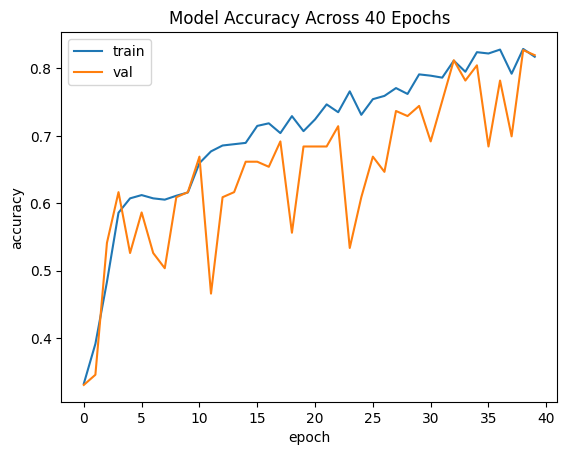

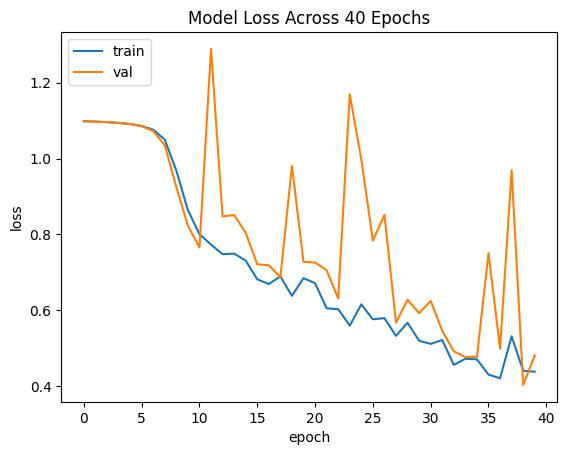

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Across 40 Epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Across 40 Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 8. Hyperparameter Optimization

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(filters=64, kernel_size=5,
                        strides=2, padding="same",
                        activation='relu',
                        kernel_initializer=weight_initializer,
                        input_shape=(227, 227, 3)))
model.add(layers.MaxPooling2D(pool_size=3, strides=2))

model.add(layers.Conv2D(filters=128, kernel_size=5,
                        strides=2, padding="same",
                        activation='relu',
                        kernel_initializer=weight_initializer))
model.add(layers.MaxPooling2D(pool_size=3, strides=2))

model.add(layers.Conv2D(filters=256, kernel_size=5,
                        strides=2, padding="same",
                        activation='relu',
                        kernel_initializer=weight_initializer))
model.add(layers.MaxPooling2D(pool_size=3, strides=2))
model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu',
                       kernel_initializer=weight_initializer))
model.add(layers.Dense(128, activation='relu',
                       kernel_initializer=weight_initializer))
model.add(layers.Dense(32, activation='relu',
                       kernel_initializer=weight_initializer))
model.add(layers.Dense(3))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])


history = model.fit(train_set_normalized, epochs=20,
                    validation_data=validation_set_normalized)

test_loss, test_acc = model.evaluate(test_set_normalized)

print(f"Test set accuracy: {test_acc}")

Epoch 1/20
33/33 [==============================] - 10s 126ms/step - loss: 1.0655 - accuracy: 0.4072 - val_loss: 1.1026 - val_accuracy: 0.4737
Epoch 2/20
33/33 [==============================] - 6s 146ms/step - loss: 0.9427 - accuracy: 0.5039 - val_loss: 0.9111 - val_accuracy: 0.5188
Epoch 3/20
33/33 [==============================] - 5s 118ms/step - loss: 0.8808 - accuracy: 0.5406 - val_loss: 0.8476 - val_accuracy: 0.5414
Epoch 4/20
33/33 [==============================] - 6s 148ms/step - loss: 0.8395 - accuracy: 0.5658 - val_loss: 0.8123 - val_accuracy: 0.5940
Epoch 5/20
33/33 [==============================] - 6s 153ms/step - loss: 0.7829 - accuracy: 0.6093 - val_loss: 0.7440 - val_accuracy: 0.6090
Epoch 6/20
33/33 [==============================] - 5s 122ms/step - loss: 0.7276 - accuracy: 0.6480 - val_loss: 0.7222 - val_accuracy: 0.7068
Epoch 7/20
33/33 [==============================] - 6s 150ms/step - loss: 0.6959 - accuracy: 0.6886 - val_loss: 0.7132 - val_accuracy: 0.6617
Epoch

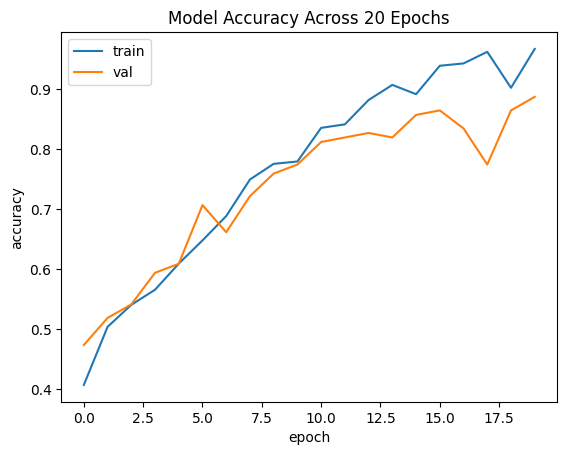

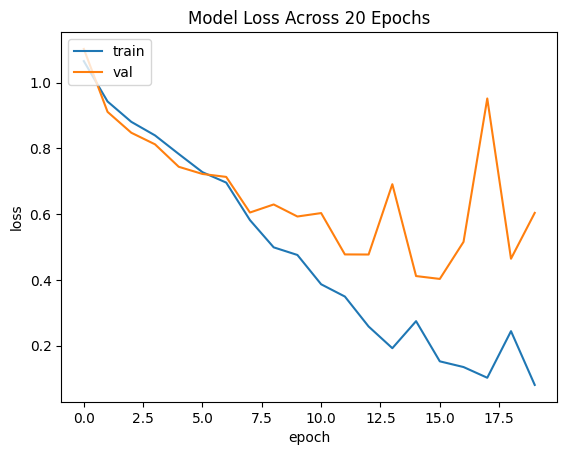

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Across 20 Epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Across 20 Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 9. Visualizing Feature Maps

In [17]:
conv_layers = [layer.name for layer in model.layers if "conv" in layer.name]
classes = ["angular_leaf_spot", "bean_rust", "healthy"]
print(conv_layers)

['conv2d_17', 'conv2d_18', 'conv2d_19']


In [18]:
import numpy as np

train_set = tf.keras.utils.image_dataset_from_directory(
    directory='beans/train/',
    labels='inferred',
    batch_size=None,
    image_size=(227, 227),
    shuffle=False)

def extract_images(dataset, label_value):
    for img, label in dataset.filter(lambda img, label: label == label_value).take(1):
        extracted_image = np.expand_dims(img.numpy(), axis=0)
        return extracted_image

train_imgs = train_set.map(lambda imgs, labels: imgs)
normalization_layer = layers.Normalization(axis=-1)
normalization_layer.adapt(train_imgs)

train_set_normalized = train_set.map(lambda imgs, labels: (normalization_layer(imgs), labels))

angular_leaf_spot = extract_images(train_set, 0)
bean_rust = extract_images(train_set, 1)
healthy = extract_images(train_set, 2)

leaf_images = [angular_leaf_spot, bean_rust, healthy]

angular_leaf_spot_normalized = extract_images(train_set_normalized, 0)
bean_rust_normalized = extract_images(train_set_normalized, 1)
healthy_normalized = extract_images(train_set_normalized, 2)

leaf_images_normalized = [angular_leaf_spot_normalized, bean_rust_normalized, healthy_normalized]

prediction_cache = {}
def visualize_feature_maps(layer_idx, class_idx):
    layer_output = model.get_layer(conv_layers[layer_idx]).output
    test_model = models.Model(inputs=model.inputs, outputs=layer_output)

    if (layer_idx, class_idx) not in prediction_cache:
        prediction_cache[(layer_idx, class_idx)] = test_model.predict(leaf_images_normalized[class_idx])
    feature_maps = prediction_cache[(layer_idx, class_idx)]

    plt.figure(figsize=(12, 6))
    ax1 = plt.subplot(2,3,1)
    feature_map = np.random.randint(low=0, high=layer_output.shape[-1])
    plt.imshow(feature_maps[0, :, :, feature_map], cmap='hot')
    ax1.set_xlabel(f"Layer: {conv_layers[layer_idx]}, Feature Map: {feature_map}")

    ax2 = plt.subplot(2,3,2)
    feature_map = np.random.randint(low=0, high=layer_output.shape[-1])
    plt.imshow(feature_maps[0, :, :, feature_map], cmap='hot')
    ax2.set_xlabel(f"Layer: {conv_layers[layer_idx]}, Feature Map: {feature_map}")

    ax3 = plt.subplot(2,3,3)
    feature_map = np.random.randint(low=0, high=layer_output.shape[-1])
    plt.imshow(feature_maps[0, :, :, feature_map], cmap='hot')
    ax3.set_xlabel(f"Layer: {conv_layers[layer_idx]}, Feature Map: {feature_map}")

    ax4 = plt.subplot(2,1,2)
    plt.imshow(leaf_images[class_idx][0]/255.)

    axes = [ax1, ax2, ax3, ax4]
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])

    plt.xlabel(f"Image Class: {classes[class_idx]}")
    plt.show()

Found 1034 files belonging to 3 classes.


1/1 [==============================] - 0s 98ms/step


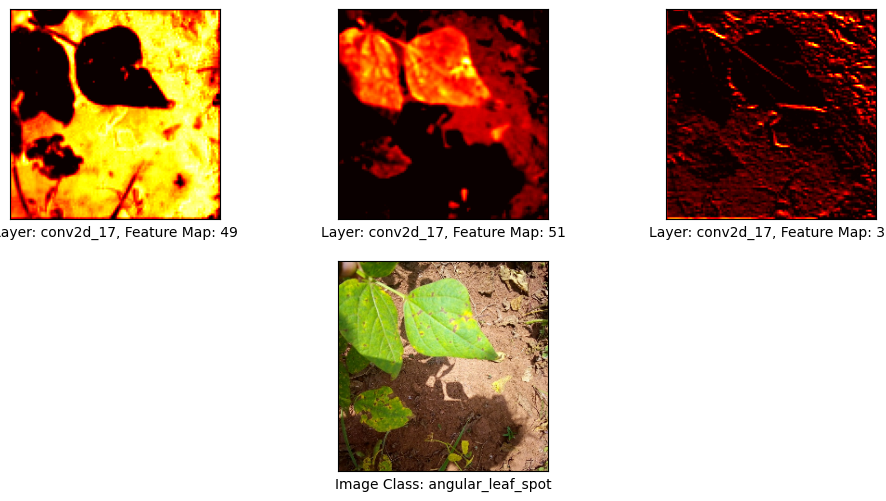

In [19]:
visualize_feature_maps(0, 0)

1/1 [==============================] - 0s 124ms/step


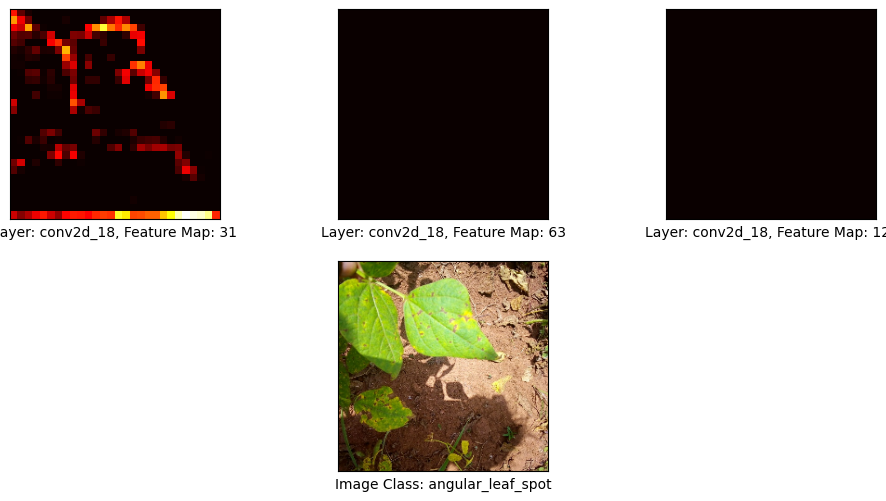

In [20]:
visualize_feature_maps(1, 0)

1/1 [==============================] - 0s 137ms/step


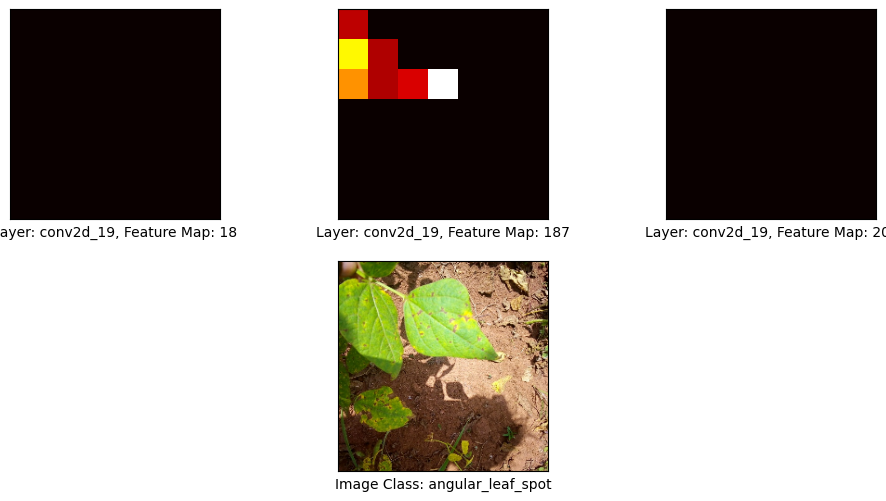

In [21]:
visualize_feature_maps(2, 0)

1/1 [==============================] - 0s 40ms/step


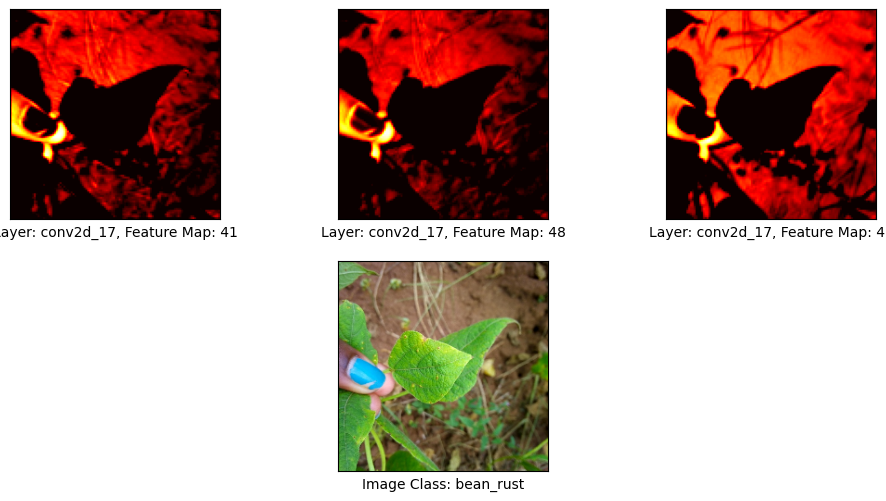

In [22]:
visualize_feature_maps(0, 1)

1/1 [==============================] - 0s 53ms/step


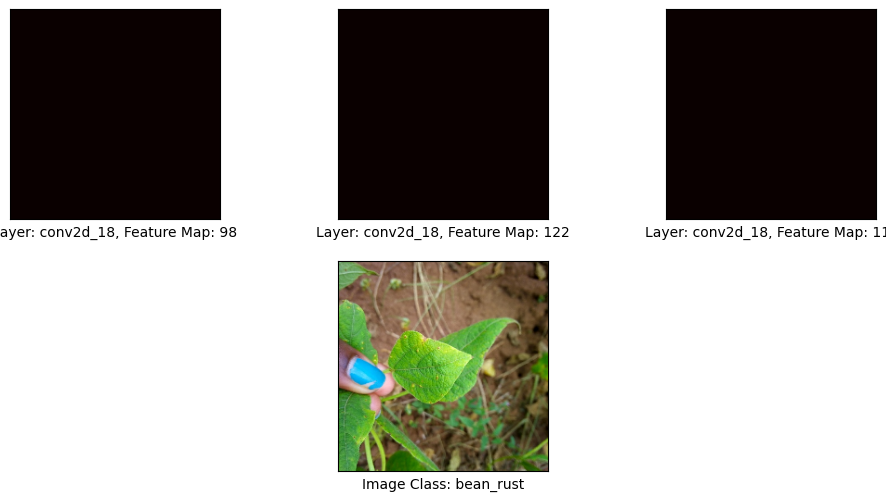

In [23]:
visualize_feature_maps(1, 1)

1/1 [==============================] - 0s 62ms/step


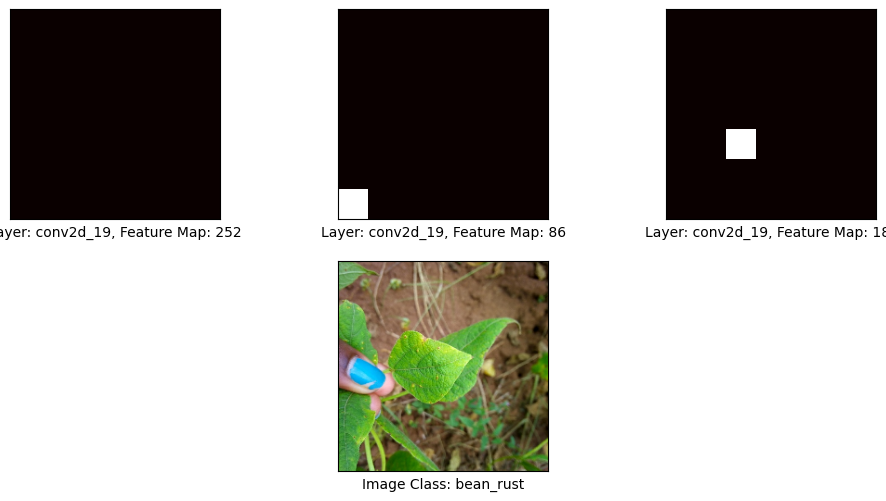

In [24]:
visualize_feature_maps(2, 1)

1/1 [==============================] - 0s 51ms/step


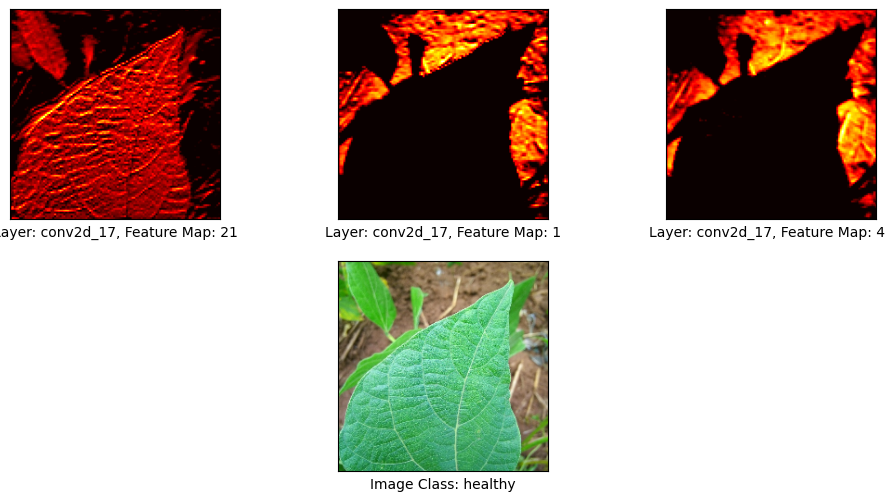

In [25]:
visualize_feature_maps(0, 2)

1/1 [==============================] - 0s 58ms/step


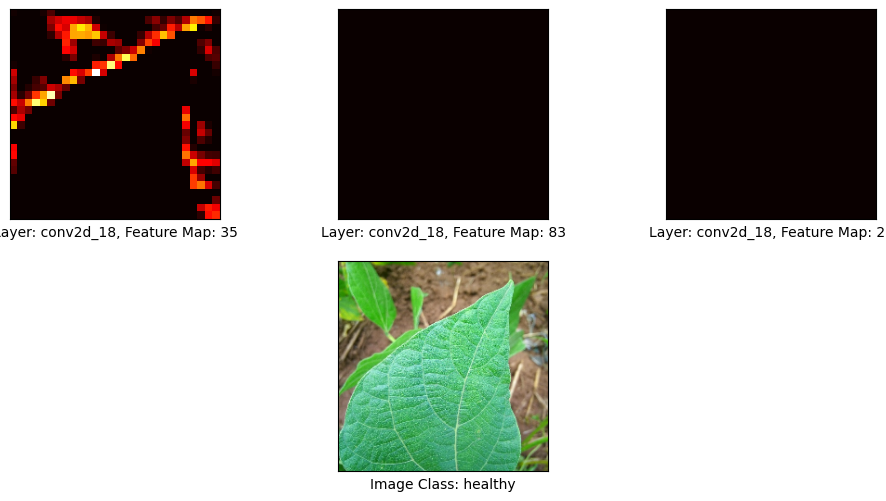

In [26]:
visualize_feature_maps(1, 2)

1/1 [==============================] - 0s 55ms/step


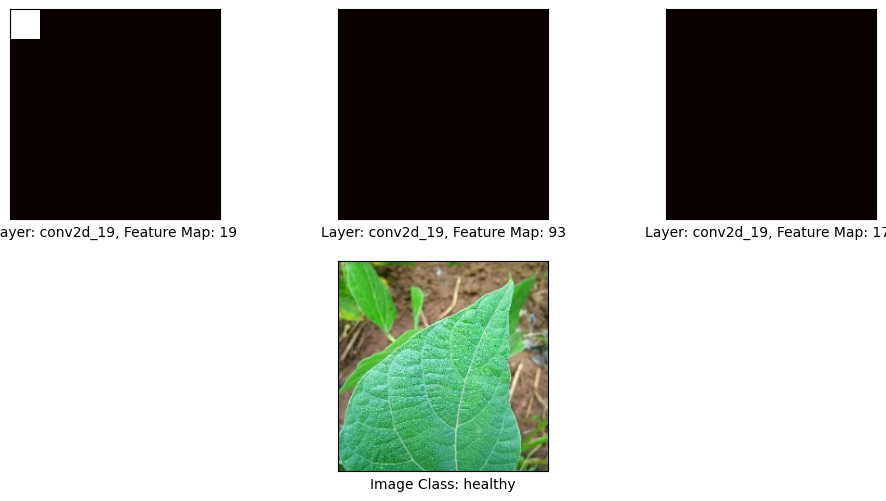

In [27]:
visualize_feature_maps(2, 2)